# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [731]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.metrics import classification_report_imbalanced, geometric_mean_score


In [732]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [734]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [735]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [736]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [737]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Handling missing data

In [738]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Groupby Analysis of categorical variable

Group By Analysis for sales_channel:
sales_channel
Internet    0.154770
Mobile      0.108402
Name: booking_complete, dtype: float64


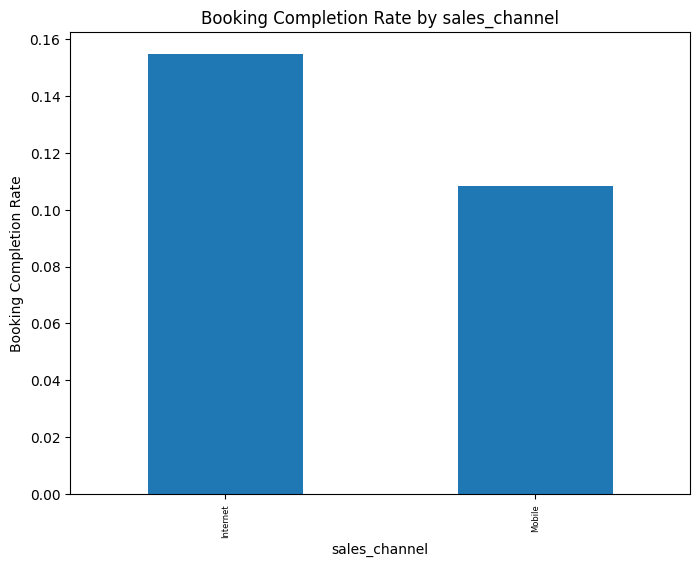

Group By Analysis for trip_type:
trip_type
CircleTrip    0.043103
OneWay        0.051680
RoundTrip     0.150575
Name: booking_complete, dtype: float64


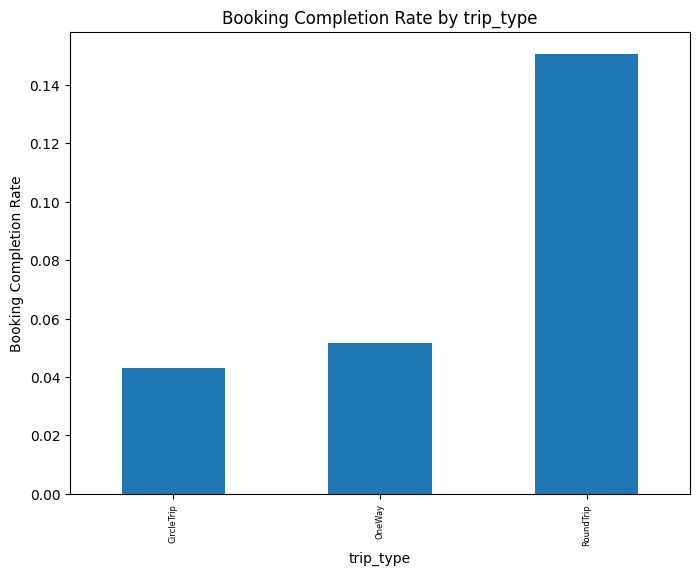

Group By Analysis for route:
route
AKLDEL    0.000000
AKLHGH    0.000000
AKLHND    0.000000
AKLICN    0.000000
AKLKIX    0.000000
            ...   
TRZWUH    0.000000
TRZXIY    0.000000
TWUWUH    0.500000
TWUXIY    0.285714
URTXIY    0.000000
Name: booking_complete, Length: 799, dtype: float64


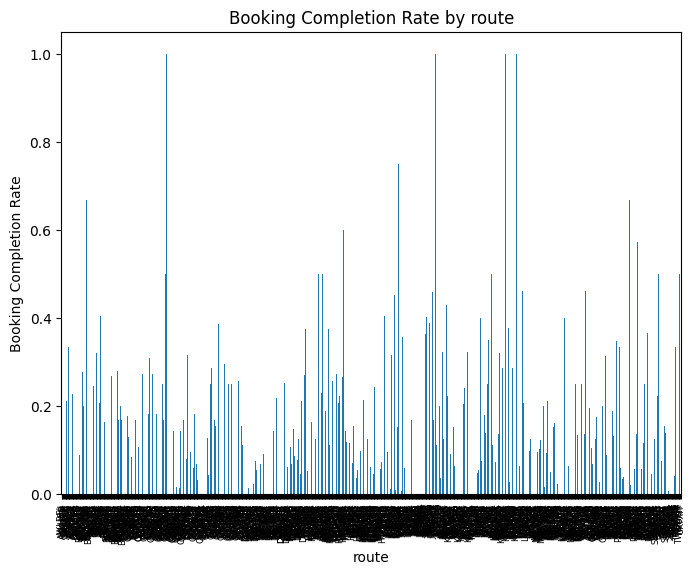

Group By Analysis for booking_origin:
booking_origin
(not set)               0.166667
Afghanistan             0.000000
Algeria                 0.000000
Argentina               0.000000
Australia               0.050358
                          ...   
United Arab Emirates    0.071429
United Kingdom          0.121387
United States           0.184211
Vanuatu                 1.000000
Vietnam                 0.293814
Name: booking_complete, Length: 104, dtype: float64


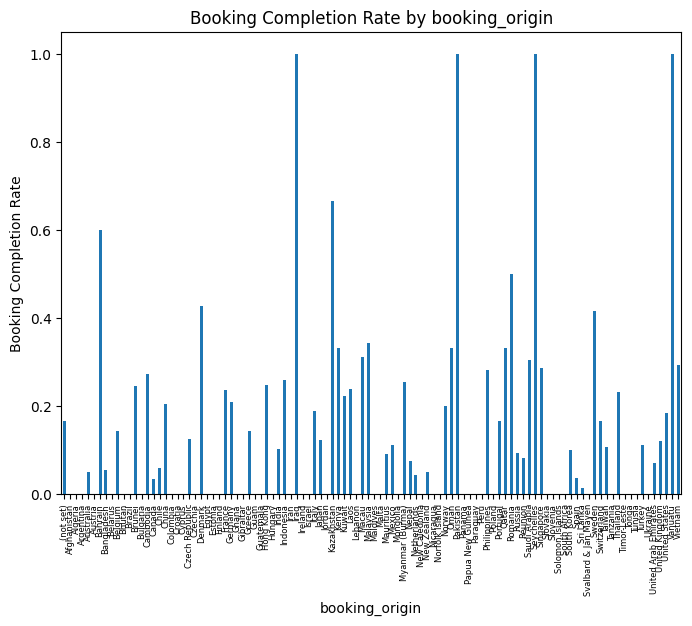

In [739]:
categorical_vars = df.select_dtypes(include=['object'])
for column in categorical_vars.columns:
    print(f'Group By Analysis for {column}:')
    
    # Group by the categorical variable and calculate mean booking completion
    grouped_data = df.groupby(column)['booking_complete'].mean()
    print(grouped_data)
    
     # Visualize the group by analysis using a bar plot
    grouped_data.plot(kind='bar', figsize=(8, 6), title=f'Booking Completion Rate by {column}')
    plt.ylabel('Booking Completion Rate')
    plt.xticks(rotation=90, fontsize=6)
    plt.show()

Instead of route we create new column with short flights and long haul flights route categories from flight duration

In [740]:
print(df['route'].nunique())

799


Remove route column

In [741]:
df.drop('route', axis=1, inplace=True)

Replace flight duration into short-haul, medium-haul, long-haul category

In [742]:
df['flight_duration_category'] = pd.cut(df['flight_duration'], bins=[0, 2, 5, np.inf], 
                                        labels=['short-haul', 'medium-haul', 'long-haul'])


In [743]:
df['flight_duration_category'] = df['flight_duration_category'].astype('object')

In [744]:
print(df['flight_duration_category'].unique())

['long-haul' 'medium-haul']


Grouping the booking origin into continents category

In [745]:
print(df['booking_origin'].unique())

['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'Réunion' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland' 'Nicaragua' 'Maldives' 'Egypt' 'Israel' 'Tunisia'
 'South Africa' 'Papua New Guinea' 'Paraguay' 'Estonia

In [746]:
# Dictionary mapping countries to continents
country_to_continent = {
    'New Zealand': 'Oceania', 'India': 'Asia', 'United Kingdom': 'Europe', 'China': 'Asia',
    'South Korea': 'Asia', 'Japan': 'Asia', 'Malaysia': 'Asia', 'Singapore': 'Asia',
    'Switzerland': 'Europe', 'Germany': 'Europe', 'Indonesia': 'Asia', 'Czech Republic': 'Europe',
    'Vietnam': 'Asia', 'Thailand': 'Asia', 'Spain': 'Europe', 'Romania': 'Europe', 'Ireland': 'Europe',
    'Italy': 'Europe', 'Slovakia': 'Europe', 'United Arab Emirates': 'Middle East', 'Tonga': 'Oceania',
    'Saudi Arabia': 'Middle East', 'Netherlands': 'Europe', 'Qatar': 'Middle East', 'Hong Kong': 'Asia',
    'Philippines': 'Asia', 'Sri Lanka': 'Asia', 'France': 'Europe', 'Croatia': 'Europe', 'United States': 'North America',
    'Laos': 'Asia', 'Hungary': 'Europe', 'Portugal': 'Europe', 'Cyprus': 'Europe', 'Australia': 'Oceania',
    'Cambodia': 'Asia', 'Poland': 'Europe', 'Belgium': 'Europe', 'Oman': 'Middle East', 'Bangladesh': 'Asia',
    'Kazakhstan': 'Asia', 'Brazil': 'South America', 'Turkey': 'Middle East', 'Kenya': 'Africa',
    'Taiwan': 'Asia', 'Brunei': 'Asia', 'Chile': 'South America', 'Bulgaria': 'Europe', 'Ukraine': 'Europe',
    'Denmark': 'Europe', 'Colombia': 'South America', 'Iran': 'Middle East', 'Bahrain': 'Middle East',
    'Solomon Islands': 'Oceania', 'Slovenia': 'Europe', 'Mauritius': 'Africa', 'Nepal': 'Asia', 'Russia': 'Asia',
    'Kuwait': 'Middle East', 'Mexico': 'North America', 'Sweden': 'Europe', 'Austria': 'Europe', 'Lebanon': 'Middle East',
    'Jordan': 'Middle East', 'Greece': 'Europe', 'Mongolia': 'Asia', 'Canada': 'North America', 'Tanzania': 'Africa',
    'Peru': 'South America', 'Timor-Leste': 'Asia', 'Argentina': 'South America', 'New Caledonia': 'Oceania',
    'Macau': 'Asia', 'Myanmar (Burma)': 'Asia', 'Norway': 'Europe', 'Panama': 'North America', 'Bhutan': 'Asia',
    'Norfolk Island': 'Oceania', 'Finland': 'Europe', 'Nicaragua': 'North America', 'Maldives': 'Asia',
    'Egypt': 'Africa', 'Israel': 'Middle East', 'Tunisia': 'Africa', 'South Africa': 'Africa', 'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America', 'Estonia': 'Europe', 'Seychelles': 'Africa', 'Afghanistan': 'Asia',
    'Guam': 'Oceania', 'Czechia': 'Europe', 'Malta': 'Europe', 'Vanuatu': 'Oceania', 'Belarus': 'Europe',
    'Pakistan': 'Asia', 'Iraq': 'Middle East', 'Ghana': 'Africa', 'Gibraltar': 'Europe', 'Guatemala': 'North America',
    'Algeria': 'Africa', 'Svalbard & Jan Mayen': 'Europe'
}


In [747]:
# Replace countries with continents using the map function
df['booking_origin_continent'] = df['booking_origin'].map(country_to_continent)
df.drop(['booking_origin'], axis=1, inplace=True)

Flight booking according to the continent

In [748]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Calculate value counts for each continent based on booking status
booking_true_continent = booking_true['booking_origin_continent'].value_counts()
booking_false_continent = booking_false['booking_origin_continent'].value_counts()

# Create subplots with two pie charts side by side
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]], 
                    subplot_titles=('Proportion of Bookings by Continent', 'Proportion of No Bookings by Continent'))

# Pie chart for true bookings
fig.add_trace(go.Pie(
    labels=booking_true_continent.index,
    values=booking_true_continent.values,
    hole=0.0,
    textinfo='percent+label',
    insidetextorientation='radial',
    pull=[0.1]*len(booking_true_continent),  # Adjusts the pull for emphasis
    marker=dict(line=dict(color='#FFFFFF', width=2)),
    rotation=180,
    domain=dict(x=[0.1, 0.45], y=[0.1, 0.9])  # Adjusts the pie chart size and position
), row=1, col=1)

# Pie chart for false bookings
fig.add_trace(go.Pie(
    labels=booking_false_continent.index,
    values=booking_false_continent.values,
    hole=0.0,
    textinfo='percent+label',
    insidetextorientation='radial',
    pull=[0.1]*len(booking_false_continent),
    marker=dict(line=dict(color='#FFFFFF', width=2)),
    rotation=270,
    domain=dict(x=[0.55, 0.9], y=[0.1, 0.9])  # Adjusts the pie chart size and position
), row=1, col=2)

# Update layout for the figure
fig.update_layout(
    title_text="Booking and No Booking Proportions by Continent",
    showlegend=False,
    annotations=[dict(text='Completed', x=0.20, y=1.0, font_size=15, showarrow=False),
                 dict(text='Not Completed', x=0.82, y=1.0, font_size=15, showarrow=False)],
    height=600,  # Adjusts the height of the figure
    margin=dict(t=60, b=60, l=40, r=40)  # Adjust margins for better spacing
)

# Show the plot
fig.show()


A significant portion of completed bookings originated from countries in Asia, followed by Oceania. Conversely, while Asia saw the highest proportion of no bookings, Oceania had a notably larger share of no bookings compared to bookings. South America recorded the lowest percentage of completed bookings, whereas North America had the smallest share of no bookings.

In [749]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_duration_category,booking_origin_continent
0,2,Internet,RoundTrip,262,19,7,6,1,0,0,5.52,0,long-haul,Oceania
1,1,Internet,RoundTrip,112,20,3,6,0,0,0,5.52,0,long-haul,Oceania
2,2,Internet,RoundTrip,243,22,17,3,1,1,0,5.52,0,long-haul,Asia
3,1,Internet,RoundTrip,96,31,4,6,0,0,1,5.52,0,long-haul,Oceania
4,2,Internet,RoundTrip,68,22,15,3,1,0,1,5.52,0,long-haul,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,1,0,1,5.62,0,long-haul,Oceania
49996,1,Internet,RoundTrip,111,6,4,7,0,0,0,5.62,0,long-haul,Oceania
49997,1,Internet,RoundTrip,24,6,22,6,0,0,1,5.62,0,long-haul,Oceania
49998,1,Internet,RoundTrip,15,6,11,1,1,0,1,5.62,0,long-haul,Oceania


Groupby triptype with booking complete

In [750]:
trip_type = df.groupby('booking_complete')['trip_type'].value_counts().unstack(fill_value=0)
trip_type



trip_type,CircleTrip,OneWay,RoundTrip
booking_complete,,,
0,111,367,42044
1,5,20,7453


In [751]:
#print(df.loc[df['trip_type'] == 'OneWay'])
print(df.loc[df['trip_type'] == 'CircleTrip'])

       num_passengers sales_channel   trip_type  purchase_lead  \
20                  2      Internet  CircleTrip            228   
78                  1        Mobile  CircleTrip            281   
79                  1      Internet  CircleTrip            282   
4604                1      Internet  CircleTrip            157   
4720                1      Internet  CircleTrip             48   
...               ...           ...         ...            ...   
48844               1      Internet  CircleTrip              0   
49036               1      Internet  CircleTrip             40   
49045               1      Internet  CircleTrip            116   
49073               1      Internet  CircleTrip            303   
49317               1      Internet  CircleTrip             27   

       length_of_stay  flight_hour  flight_day  wants_extra_baggage  \
20                 29           23           3                    1   
78                 18            3           3                   

Finding correlation between purchase lead and lenght of stay

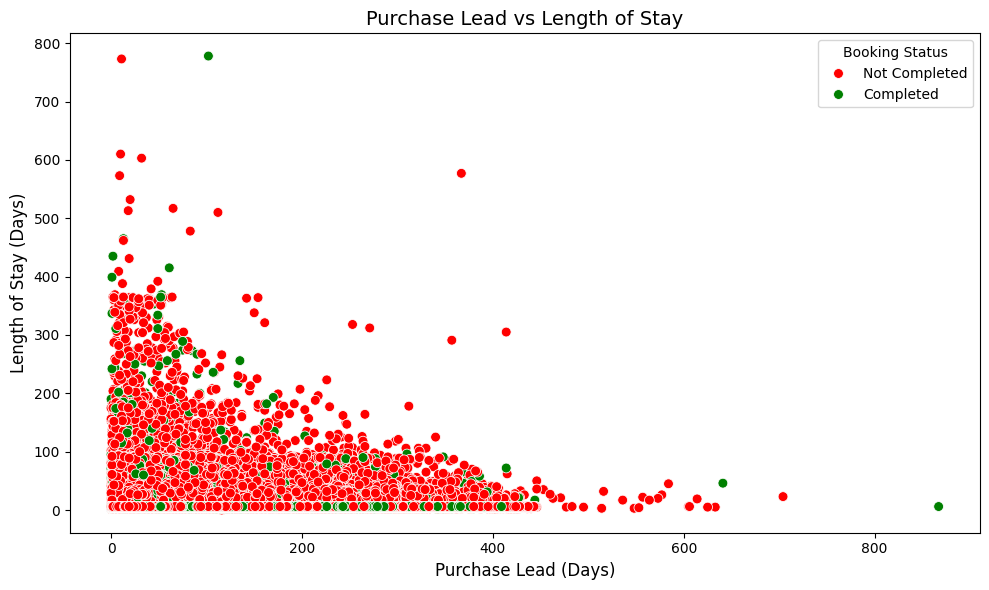

In [752]:
round_trip = df[(df['trip_type'] != 'OneWay') & (df['length_of_stay'] != 1)]


import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# Assuming 'df' has columns 'purchase_lead', 'length_of_stay', and 'booking_complete'
# Ensure that 'booking_complete' has 0 and 1 values for 'Not Completed' and 'Completed'

# Custom color map for 'booking_complete'
color_map = {0: 'red', 1: 'green'}

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=round_trip, x='purchase_lead', y='length_of_stay', hue='booking_complete', 
                palette=color_map, s=50)  # 's' controls the size of the markers

# Set the axis labels
plt.xlabel('Purchase Lead (Days)', fontsize=12)
plt.ylabel('Length of Stay (Days)', fontsize=12)

# Set the title of the plot
plt.title('Purchase Lead vs Length of Stay', fontsize=14)

# Customize the legend to display 'Completed' and 'Not Completed'
handles, labels = plt.gca().get_legend_handles_labels()
# Customizing the labels in the legend
labels = ['Not Completed', 'Completed']

# Set custom labels for the legend
plt.legend(handles=handles, labels=labels, title="Booking Status", loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


Many customers wished to do last minute booking, but most of the booking is not complete. 
Some tickets were looked way earlier and booked, one booking we done some 800 days before and few of them are found between 450 and 800 but most of them are incomplete booking.
Likewise, lenght of stay showed some outliers around 400 and 800,
So, we can remove these outlier for prediction model.

Remove outlier in purchase lead and lenght of stay

In [753]:
df = df[df['purchase_lead'] < 500]
df = df[df['length_of_stay'] < 400]

Proportion of booking in different sales channel in each continent

<Figure size 1000x800 with 0 Axes>

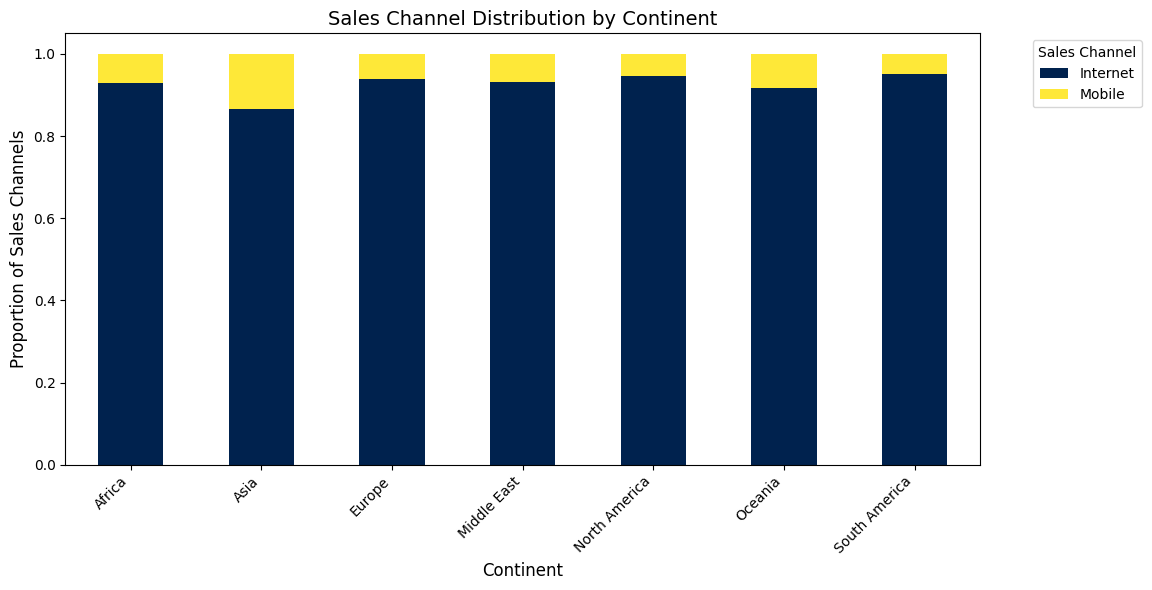

In [754]:
continent_sales_channel = df.groupby('booking_origin_continent')['sales_channel'].value_counts(normalize=True).unstack(fill_value=0)

plt.figure(figsize=(10,8))
continent_sales_channel.plot(kind='bar', stacked=True, figsize=(10,6), colormap='cividis')

plt.title('Sales Channel Distribution by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Proportion of Sales Channels', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()

plt.legend(title="Sales Channel", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



Overall, customers preferred using the interent channel to book flights (more than 80% in all continents).
Asian continent showed higher proportion of booking (more than 5%) through mobile (could also include British airways application) compared to other continents, whereas South America showed least amout of booking using mobile channel.  

Creating a new interaction feature

In [755]:
df['lead_stay_interaction'] = df['purchase_lead'] * df['length_of_stay']


In [756]:
print(df['purchase_lead'].max())
bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500']
df['purchase_lead_category'] = pd.cut(df['purchase_lead'], bins=bins, labels=labels)
df['purchase_lead_category'] = df['purchase_lead_category'].astype('object')
df = df.drop('purchase_lead', axis=1)

495


Removing flight_duration from the dataframe

In [757]:
df.drop([ 'flight_duration'], axis=1, inplace=True)

Selecting Categorical variable features for modeling by finding significance with target variable

In [758]:
categorical_variables = df.select_dtypes(include=['object'])
categorical_variables

,sales_channel,trip_type,flight_duration_category,booking_origin_continent,purchase_lead_category
0,Internet,RoundTrip,long-haul,Oceania,201-300
1,Internet,RoundTrip,long-haul,Oceania,101-200
2,Internet,RoundTrip,long-haul,Asia,201-300
3,Internet,RoundTrip,long-haul,Oceania,0-100
4,Internet,RoundTrip,long-haul,Asia,0-100
...,...,...,...,...,...
49995,Internet,RoundTrip,long-haul,Oceania,0-100
49996,Internet,RoundTrip,long-haul,Oceania,101-200
49997,Internet,RoundTrip,long-haul,Oceania,0-100
49998,Internet,RoundTrip,long-haul,Oceania,0-100


Check correlation between categorical feature and target (booking_complete)

In [759]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

categorical_variables['sales_channel'] = LabelEncoder().fit_transform(df['sales_channel'])
chi2_stat, p_value = chi2(categorical_variables[['sales_channel']], df['booking_complete'])
print(f"sales_channel: Chi-Squared Statistic: {chi2_stat}, P-value: {p_value}")

sales_channel: Chi-Squared Statistic: [74.52432496], P-value: [5.98956929e-18]


In [760]:
categorical_variables['trip_type'] = LabelEncoder().fit_transform(df['trip_type'])
chi2_stat, p_value = chi2(categorical_variables[['trip_type']], df['booking_complete'])
print(f"Trip type: Chi-Squared Statistic: {chi2_stat}, P-value: {p_value}")

Trip type: Chi-Squared Statistic: [0.30994662], P-value: [0.57771294]


In [761]:
categorical_variables['booking_origin_continent'] = LabelEncoder().fit_transform(df['booking_origin_continent'])
chi2_stat, p_value = chi2(categorical_variables[['booking_origin_continent']], df['booking_complete'])
print(f"Booking_origin_continent: Chi-Squared Statistic: {chi2_stat}, P-value: {p_value}")

Booking_origin_continent: Chi-Squared Statistic: [3429.10056496], P-value: [0.]


In [762]:
categorical_variables['flight_duration_category'] = LabelEncoder().fit_transform(df['booking_origin_continent'])
chi2_stat, p_value = chi2(categorical_variables[['flight_duration_category']], df['booking_complete'])
print(f"Flight_duration_category: Chi-Squared Statistic: {chi2_stat}, P-value: {p_value}")

Flight_duration_category: Chi-Squared Statistic: [3429.10056496], P-value: [0.]


In [763]:
categorical_variables['purchase_lead_category'] = LabelEncoder().fit_transform(df['booking_origin_continent'])
chi2_stat, p_value = chi2(categorical_variables[['purchase_lead_category']], df['booking_complete'])
print(f"Flight_duration_category: Chi-Squared Statistic: {chi2_stat}, P-value: {p_value}")

Flight_duration_category: Chi-Squared Statistic: [3429.10056496], P-value: [0.]


In [764]:
print("Feature- sales channel, flight_duration_category, purchase_lead_category and booking_origin_continent is significantly associated with booking complete.")


Feature- sales channel, flight_duration_category, purchase_lead_category and booking_origin_continent is significantly associated with booking complete.


Selecting numerical variable for modeling

In [765]:
numerical_vars = df.select_dtypes(include=['float', 'int'])
numerical_vars

,num_passengers,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,lead_stay_interaction
0,2,19,7,6,1,0,0,0,4978
1,1,20,3,6,0,0,0,0,2240
2,2,22,17,3,1,1,0,0,5346
3,1,31,4,6,0,0,1,0,2976
4,2,22,15,3,1,0,1,0,1496
...,...,...,...,...,...,...,...,...,...
49995,2,6,9,6,1,0,1,0,162
49996,1,6,4,7,0,0,0,0,666
49997,1,6,22,6,0,0,1,0,144
49998,1,6,11,1,1,0,1,0,90


In [766]:
numerical_vars = df.select_dtypes(include=['float', 'int'])

# Initialize a dictionary to store the correlation results
correlation_results = {}

# Loop through each numerical variable
for column in numerical_vars.columns:
    # Calculate the Pearson correlation
    corr, _ = pearsonr(numerical_vars[column], df['booking_complete'])
    # Store the result in the dictionary
    correlation_results[column] = corr

# Convert results to a DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Feature', 'Pearson Correlation'])
print(correlation_df)

                 Feature  Pearson Correlation
0         num_passengers             0.024091
1         length_of_stay            -0.045501
2            flight_hour             0.007297
3             flight_day            -0.006936
4    wants_extra_baggage             0.068236
5   wants_preferred_seat             0.050326
6  wants_in_flight_meals             0.026499
7       booking_complete             1.000000
8  lead_stay_interaction            -0.061222


In [767]:
print("Features: length_of_stay, lead_stay_interaction, wants_extra_baggage, wants_preferred_seat showed higher correlation again booking complete. So, these features were kept for the prediciton model")

Features: length_of_stay, lead_stay_interaction, wants_extra_baggage, wants_preferred_seat showed higher correlation again booking complete. So, these features were kept for the prediciton model


Feature selection from dataframe

In [768]:
df_selected = df[['lead_stay_interaction', 'wants_extra_baggage', 'wants_preferred_seat', 'sales_channel', 'flight_duration_category', 'purchase_lead_category', 'booking_origin_continent', 'booking_complete']]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49965 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   lead_stay_interaction     49965 non-null  int64 
 1   wants_extra_baggage       49965 non-null  int64 
 2   wants_preferred_seat      49965 non-null  int64 
 3   sales_channel             49965 non-null  object
 4   flight_duration_category  49965 non-null  object
 5   purchase_lead_category    49595 non-null  object
 6   booking_origin_continent  49869 non-null  object
 7   booking_complete          49965 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.4+ MB


In [769]:
df_selected.dropna(inplace=True)
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49500 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   lead_stay_interaction     49500 non-null  int64 
 1   wants_extra_baggage       49500 non-null  int64 
 2   wants_preferred_seat      49500 non-null  int64 
 3   sales_channel             49500 non-null  object
 4   flight_duration_category  49500 non-null  object
 5   purchase_lead_category    49500 non-null  object
 6   booking_origin_continent  49500 non-null  object
 7   booking_complete          49500 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.4+ MB


C:\Users\PC\AppData\Local\Temp\ipykernel_20728\3298533152.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Preprocessing with OneHotEncoder

In [770]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables=df_selected.select_dtypes(include= ['object'])
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(categorical_variables)

encoded_df = pd.DataFrame(encoded_array, columns = encoder.get_feature_names_out(categorical_variables.columns))
encoded_df = encoded_df.astype('int')

df_final = pd.concat([df_selected, encoded_df], axis=1).drop(columns=categorical_variables.columns)
#df_final.columns = df_final.columns.str.replace('booking_origin_continent', 'booking')
df_final.columns = df_final.columns.str.replace(' ', '_')

df_final.head()

,lead_stay_interaction,wants_extra_baggage,wants_preferred_seat,booking_complete,sales_channel_Internet,sales_channel_Mobile,flight_duration_category_long-haul,flight_duration_category_medium-haul,purchase_lead_category_0-100,purchase_lead_category_101-200,purchase_lead_category_201-300,purchase_lead_category_301-400,purchase_lead_category_401-500,booking_origin_continent_Africa,booking_origin_continent_Asia,booking_origin_continent_Europe,booking_origin_continent_Middle_East,booking_origin_continent_North_America,booking_origin_continent_Oceania,booking_origin_continent_South_America
0,4978.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2240.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5346.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2976.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1496.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Distribution of numerical variable

In [771]:
#import scipy.stats as stats
#stats.probplot(df_final['length_of_stay'], dist="norm", plot=plt)
#plt.title('Q-Q Plot of Length_of_stay')
#plt.show()

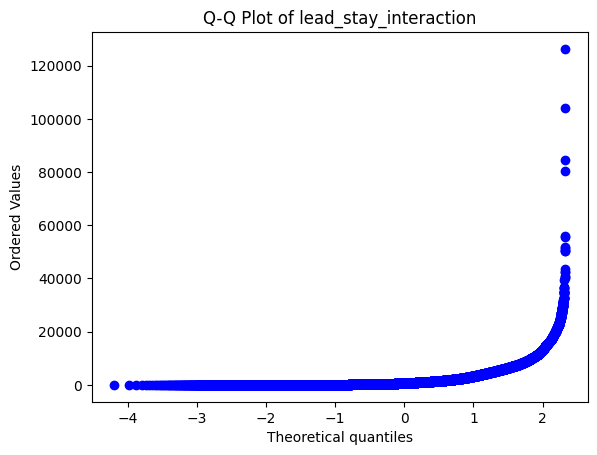

In [772]:
import scipy.stats as stats
stats.probplot(df_final['lead_stay_interaction'], dist="norm", plot=plt)
plt.title('Q-Q Plot of lead_stay_interaction')
plt.show()

In [773]:
df_final = df_final[df_final['lead_stay_interaction'] < 45000]


In [774]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49489 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead_stay_interaction                   49489 non-null  float64
 1   wants_extra_baggage                     49489 non-null  float64
 2   wants_preferred_seat                    49489 non-null  float64
 3   booking_complete                        49489 non-null  float64
 4   sales_channel_Internet                  48993 non-null  float64
 5   sales_channel_Mobile                    48993 non-null  float64
 6   flight_duration_category_long-haul      48993 non-null  float64
 7   flight_duration_category_medium-haul    48993 non-null  float64
 8   purchase_lead_category_0-100            48993 non-null  float64
 9   purchase_lead_category_101-200          48993 non-null  float64
 10  purchase_lead_category_201-300          48993 non-null  float64

In [775]:
df_final.dropna(inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48993 entries, 0 to 49499
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lead_stay_interaction                   48993 non-null  float64
 1   wants_extra_baggage                     48993 non-null  float64
 2   wants_preferred_seat                    48993 non-null  float64
 3   booking_complete                        48993 non-null  float64
 4   sales_channel_Internet                  48993 non-null  float64
 5   sales_channel_Mobile                    48993 non-null  float64
 6   flight_duration_category_long-haul      48993 non-null  float64
 7   flight_duration_category_medium-haul    48993 non-null  float64
 8   purchase_lead_category_0-100            48993 non-null  float64
 9   purchase_lead_category_101-200          48993 non-null  float64
 10  purchase_lead_category_201-300          48993 non-null  float64

Separate features and target

In [776]:
X= df_final.drop('booking_complete', axis=1)
y= df_final['booking_complete']

Split the data

In [777]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Proportion of target in train and test

In [778]:
print(y_train.value_counts(), y_train.value_counts(normalize=True)*100)
print(y_test.value_counts(), y_test.value_counts(normalize=True)*100)

booking_complete
0.0    33424
1.0     5770
Name: count, dtype: int64 booking_complete
0.0    85.278359
1.0    14.721641
Name: proportion, dtype: float64
booking_complete
0.0    8326
1.0    1473
Name: count, dtype: int64 booking_complete
0.0    84.967854
1.0    15.032146
Name: proportion, dtype: float64


Train Model

In [779]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report

# Define steps for a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Parameter grid for inner CV
param_grid = {
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 5],
    'rf__class_weight': ['balanced', {0: 1, 1: 5}, {0: 1, 1: 10}],
    'rf__max_features': ['sqrt', 'log2']
}


# Define inner cross-validation (for GridSearchCV)
inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Set up GridSearchCV with pipeline and parameter grid
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=inner_cv, scoring='f1', n_jobs=-1)


# Define outer cross-validation
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Evaluate model with outer cross-validation
outer_scores = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring='f1', n_jobs=-1)
print("Outer CV F1 scores:", outer_scores)
print("Mean outer CV F1 score:", np.mean(outer_scores))

Outer CV F1 scores: [0.27755725 0.28889252 0.27939317 0.27624661]
Mean outer CV F1 score: 0.2805223909651516


Prediction

In [780]:
# Fit the GridSearchCV on the entire training set
grid_search.fit(X_train, y_train)

# Print the best parameters from GridSearch
print("Best parameters from GridSearch:", grid_search.best_params_)

Best parameters from GridSearch: {'rf__class_weight': {0: 1, 1: 5}, 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2}


Evaluation of model on test set

In [ ]:
# Now, you can make predictions using the best model
y_pred = grid_search.predict(X_test)

# Evaluate performance on the test set
from sklearn.metrics import accuracy_score
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5349525461781814
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.52      0.66      8326
         1.0       0.18      0.61      0.28      1473

    accuracy                           0.53      9799
   macro avg       0.53      0.56      0.47      9799
weighted avg       0.78      0.53      0.60      9799



In [803]:
pd.crosstab(y_test, y_pred, rownames=['Booking'], colnames=['Predicted class'])

Predicted class,0.0,1.0
Booking,,
0.0,4348,3978
1.0,579,894


In [845]:
# Get predicted probabilities
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Apply threshold (0.55 here)
threshold = 0.55
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate performance on the test set
from sklearn.metrics import accuracy_score
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.5991427696703745
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.62      0.72      8326
         1.0       0.19      0.51      0.28      1473

    accuracy                           0.60      9799
   macro avg       0.53      0.56      0.50      9799
weighted avg       0.77      0.60      0.66      9799



In [838]:
pd.crosstab(y_test, y_pred_prob, rownames=['Booking'], colnames=['Predicted class'])

Predicted class,0,1
Booking,,
0.0,5122,3204
1.0,724,749


In [840]:
# Get the best model from the grid search (which includes SMOTE and RandomForest)
best_rf_model = grid_search.best_estimator_


# Extract the RandomForest model from the pipeline
rf_model = best_rf_model.named_steps['rf']



Extracting feature importance

In [841]:
X_train_df = pd.DataFrame(X_train, columns=X_train.columns
                                 )
# Get feature importance from the best RandomForest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to view feature importance
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,  # Assuming X_train_scaled is a DataFrame with column names
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(importance_df)


                                   Feature  Importance
0                    lead_stay_interaction    0.302374
1                      wants_extra_baggage    0.151161
2                     wants_preferred_seat    0.111259
7             purchase_lead_category_0-100    0.083551
17        booking_origin_continent_Oceania    0.082720
13           booking_origin_continent_Asia    0.073400
8           purchase_lead_category_101-200    0.053196
9           purchase_lead_category_201-300    0.026814
4                     sales_channel_Mobile    0.024918
3                   sales_channel_Internet    0.024517
6     flight_duration_category_medium-haul    0.020409
5       flight_duration_category_long-haul    0.020215
10          purchase_lead_category_301-400    0.013646
14         booking_origin_continent_Europe    0.004450
16  booking_origin_continent_North_America    0.002825
11          purchase_lead_category_401-500    0.002506
15    booking_origin_continent_Middle_East    0.001425
18  bookin

Visualize Feature Importance

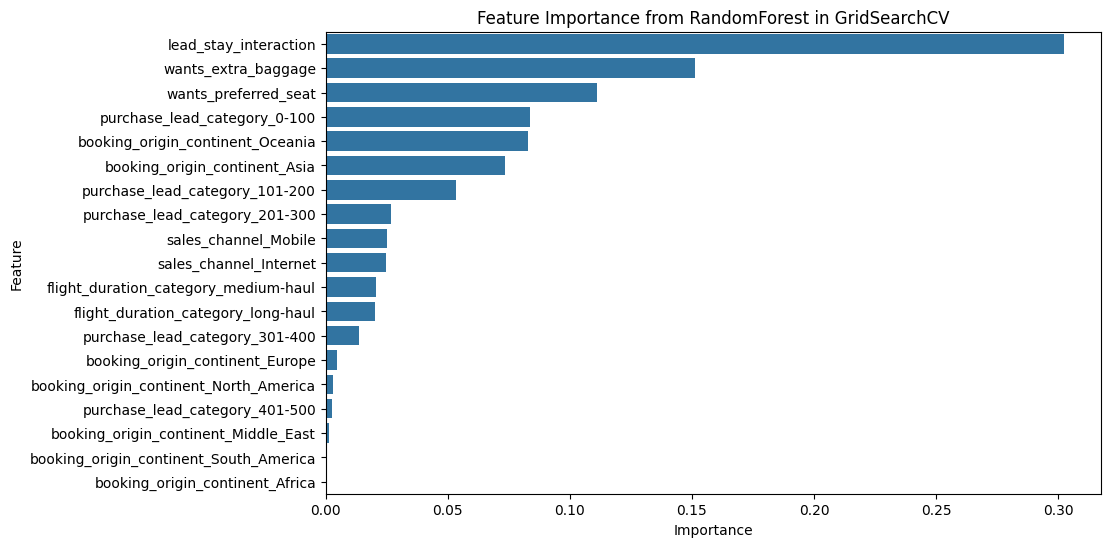

In [846]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from RandomForest in GridSearchCV')
plt.show()


Save the model with joblib

In [1]:
import joblib

joblib.dump(best_rf_model, 'random_forest_model_1.pkl')

NameError: name 'best_rf_model' is not defined

Model Interpretability

In [2]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved pipeline model
loaded_model = joblib.load('random_forest_model_1.pkl')

# Extract the RandomForestClassifier from the pipeline
rf_model = loaded_model.named_steps['rf']

# Get feature importances from the RandomForest model
feature_importances = rf_model.feature_importances_

# Assuming X_train is a pandas DataFrame and contains the feature names
# If X_train is a DataFrame, use X_train.columns to get the feature names
feature_names = X_train.columns

# Create a DataFrame for easy visualization of feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()  # To have the most important features at the top
plt.show()


NameError: name 'X_train' is not defined

In [851]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(loaded_model)

# Get SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot (for binary classification, shap_values[1] is for the positive class)
shap.summary_plot(shap_values[1], X_train)


ModuleNotFoundError: No module named 'shap'

Saving SHAP

In [ ]:
# Save the SHAP summary plot or explanation
shap.summary_plot(shap_values[1], X_train, show=False)
plt.savefig("shap_summary_plot.png")
